In [1]:
import pandas as pd 
import numpy as np 

train = pd.read_csv('../ML-DL Datasets/train.csv')
train.head(3)

,user_id,industry,location,moved_after_2019,ITU,YTU,anadolu_üniversitesi,diğer_school,ege_üniversitesi,hacettepe_üniversitesi,...,Software Development,Software Engineering,Spring Framework,Teamwork,Visual Studio,Web Development,XML,jQuery,other,skill_count
0,1301,Information Technology,istanbul,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
1,6950,Information Technology,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0
2,4880,Others,diğer,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0


In [2]:
spec_cols = ['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count', 'industry', 'location']
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,industry,location
0,2.0,92.0,4.0,2.0,23.0,Information Technology,istanbul
1,1.0,117.0,6.0,3.0,49.0,Information Technology,istanbul
2,2.0,108.0,4.0,0.0,21.0,Others,diğer
3,3.0,160.0,4.0,1.0,30.0,Information Technology,istanbul
4,2.0,160.0,3.0,2.0,48.0,Financial Services,istanbul


In [3]:
# scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [4]:
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']] = sc.fit_transform(train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']])
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count
0,-0.132132,-0.147686,0.487529,0.696960,0.140200
1,-1.002056,0.208104,1.384526,1.516626,2.018894
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315
3,0.737792,0.820063,0.487529,-0.122705,0.646002
4,-0.132132,0.820063,0.039031,0.696960,1.946637


In [5]:
# label encoder
from sklearn.preprocessing import LabelEncoder
industry_le = LabelEncoder()
location_le = LabelEncoder()

In [6]:
train['industry'] = industry_le.fit_transform(train['industry'])
train['location'] = location_le.fit_transform(train['location'])
train[['industry', 'location']].head()

,industry,location
0,11,8
1,11,8
2,16,5
3,11,8
4,8,8


In [7]:
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,industry,location
0,-0.132132,-0.147686,0.487529,0.696960,0.140200,11,8
1,-1.002056,0.208104,1.384526,1.516626,2.018894,11,8
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315,16,5
3,0.737792,0.820063,0.487529,-0.122705,0.646002,11,8
4,-0.132132,0.820063,0.039031,0.696960,1.946637,8,8


In [8]:
train = train.drop(['user_id'], axis=1)
X = train.drop(['moved_after_2019'], axis=1)
y = train[['moved_after_2019']]

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [10]:
class_weight = {0:2, 1:3}

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(class_weight={0: 2, 1: 3})

In [13]:
rf_predictions = rf.predict(X_test)

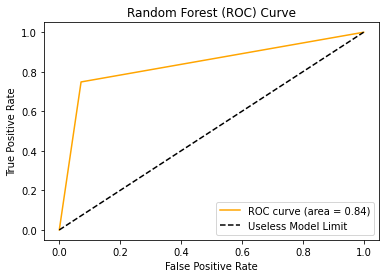

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)
auc = roc_auc_score(y_test, rf_predictions)
class_report = pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True))

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Random_Forest_Base_ROC.png')
plt.show()

In [20]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [22]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, np.ravel(y_train))

In [ ]:
print("Best parameters:", rf_grid.best_params_)
print("Train accuracy:", rf_grid.best_score_)

In [ ]:
import joblib

# save the model
joblib.dump(rf, "../Boosts/random_forest_model.joblib")

#load the model
# loaded_rf = joblib.load("./random_forest.joblib")